## Analysis of review.json

In [6]:
import json
import pandas as pd

# review.json is too large (6.3 gb)
data_size = 500000

with open("yelp_dataset/yelp_academic_dataset_review.json", 'r') as f:
    review_head = [next(f) for x in range(data_size)]
f.close()

review_data = []
for line in review_head:
    review_data.append(json.loads(line))

df = pd.DataFrame(review_data)
df.shape

(500000, 9)

In [7]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,-MhfebM0QIsKt87iDN-FNw,0,2015-04-15 05:21:16,0,xQY8N_XvtGbearJ5X4QryQ,2.0,"As someone who has worked with many museums, I...",5,OwjRMXRC0KyPrIlcjaXeFQ
1,lbrU8StCq3yDfr-QMnGrmQ,0,2013-12-07 03:16:52,1,UmFMZ8PyXZTY2QcwzsfQYA,1.0,I am actually horrified this place is still in...,1,nIJD_7ZXHq-FX8byPMOkMQ
2,HQl28KMwrEKHqhFrrDqVNQ,0,2015-12-05 03:18:11,0,LG2ZaYiOgpr2DK_90pYjNw,5.0,I love Deagan's. I do. I really do. The atmosp...,1,V34qejxNsCbcgD8C0HVk-Q
3,5JxlZaqCnk1MnbgRirs40Q,0,2011-05-27 05:30:52,0,i6g_oA9Yf9Y31qt0wibXpw,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0,ofKDkJKXSKZXu5xJNGiiBQ
4,IS4cv902ykd8wj1TR0N3-A,0,2017-01-14 21:56:57,0,6TdNDKywdbjoTkizeMce8A,4.0,"Oh happy day, finally have a Canes near my cas...",0,UgMW8bLE0QMJDCkQ1Ax5Mg


### Top Rated

In [8]:
df.sort_values(by=['stars', 'useful'], ascending=False).head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
488039,M82c96ICluambjx0wWg6Bg,99,2015-11-06 21:55:52,39,NKzbBQXO3c3LMzNoEVS10g,5.0,I went here to get a smog and I was literally ...,99,3twN5O2Ku64i5S7DjR7Faw
1482,SZEFE5hL7aN5nM-A44iPwQ,93,2013-10-24 06:28:58,75,-5pP4o7XUpFWL2Kb9u5B_A,5.0,I stopped by at Prime tonight after a grueling...,98,SIpBqzGhRM7T5cDFiuIryg
186791,mrQqy-xU6nanRoPabNw-jA,89,2012-12-12 15:53:33,88,2VizOiazC4XYQ3xuQugHkw,5.0,A timeless show about the difference between M...,96,DfmtZlDE8JJv-boorp1PAg
465129,M82c96ICluambjx0wWg6Bg,91,2016-01-25 23:04:42,35,X0gKoQuOy3Bga8sjCFRIsA,5.0,Super fast service. I walked in and they were ...,91,d7URo_srMmROIODPeiIBgw
385534,3nf-a84p8LC41_WAIvJPjg,85,2013-02-20 05:15:37,80,o_IEbpNmKsS6xfM3DJRluA,5.0,"Exceptional pizza, wth crust that's thinner th...",86,DfmtZlDE8JJv-boorp1PAg


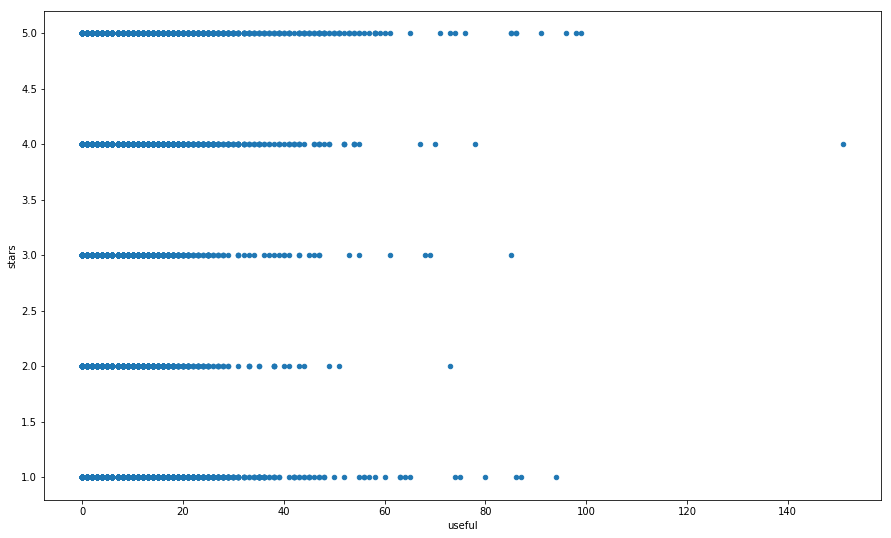

In [11]:
import matplotlib.pyplot as plt

df.plot.scatter(x='useful', y='stars', figsize=(15,9))
plt.show()

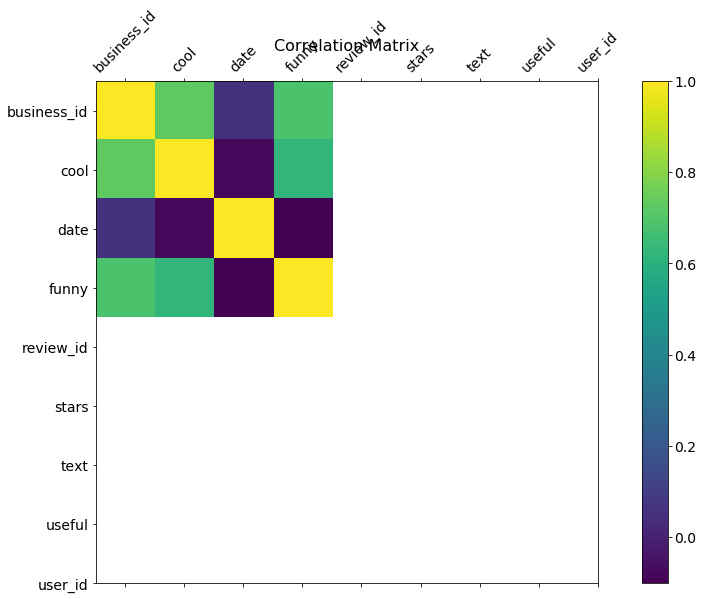

In [15]:
f = plt.figure(figsize=(16, 9))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);